In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [2]:
env='Humanoid-v4'
img_prefix =env.upper()
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMCACT"
print(df_comper.shape)

(11894, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_done/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(13497, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,25-09-2023 16:17:37,42,0,42,0.002088,1,43,True,206.243882,206.243882,206.243882,206.243882,206.243882,COMCACT
1,1,2,Humanoid-v4,25-09-2023 16:18:54,70,0,70,0.003479,2,29,True,126.026320,166.135101,166.135101,166.135101,166.135101,COMCACT
2,1,3,Humanoid-v4,25-09-2023 16:19:56,89,0,89,0.004424,3,20,True,91.657540,141.309248,141.309248,141.309248,141.309248,COMCACT
3,1,4,Humanoid-v4,25-09-2023 16:21:58,127,0,127,0.006312,4,39,True,178.831132,150.689719,150.689719,150.689719,150.689719,COMCACT
4,1,5,Humanoid-v4,25-09-2023 16:23:26,155,0,155,0.007704,5,29,True,141.279214,148.807618,148.807618,148.807618,148.807618,COMCACT


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,04-10-2023 04:27:50,16,17,0,0.000795,1,17,True,77.958053,77.958053,77.958053,77.958053,77.958053,DDPG
1,1,2,Humanoid-v4,04-10-2023 04:27:52,32,33,0,0.001591,2,17,True,77.300564,77.629308,77.629308,77.629308,77.629308,DDPG
2,1,3,Humanoid-v4,04-10-2023 04:27:54,49,50,0,0.002435,3,18,True,82.092076,79.116897,79.116897,79.116897,79.116897,DDPG
3,1,4,Humanoid-v4,04-10-2023 04:27:56,64,65,0,0.003181,4,16,True,71.229714,77.145101,77.145101,77.145101,77.145101,DDPG
4,1,5,Humanoid-v4,04-10-2023 04:27:58,80,81,0,0.003976,5,17,True,76.516575,77.019396,77.019396,77.019396,77.019396,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,25-09-2023 16:17:37,42,0,42,0.002088,1,43,True,206.243882,206.243882,206.243882,206.243882,206.243882,COMCACT
1,1,2,Humanoid-v4,25-09-2023 16:18:54,70,0,70,0.003479,2,29,True,126.026320,166.135101,166.135101,166.135101,166.135101,COMCACT
2,1,3,Humanoid-v4,25-09-2023 16:19:56,89,0,89,0.004424,3,20,True,91.657540,141.309248,141.309248,141.309248,141.309248,COMCACT
3,1,4,Humanoid-v4,25-09-2023 16:21:58,127,0,127,0.006312,4,39,True,178.831132,150.689719,150.689719,150.689719,150.689719,COMCACT
4,1,5,Humanoid-v4,25-09-2023 16:23:26,155,0,155,0.007704,5,29,True,141.279214,148.807618,148.807618,148.807618,148.807618,COMCACT


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
2779,5,2780,Humanoid-v4,06-10-2023 16:10:17,49952,49953,0,0.999,2548,16,True,73.242973,94.834844,70.582681,70.476207,73.006646,DDPG
2780,5,2781,Humanoid-v4,06-10-2023 16:11:06,49967,49968,0,0.999,2549,16,True,73.469846,94.827161,70.589106,70.489986,73.093718,DDPG
2781,5,2782,Humanoid-v4,06-10-2023 16:11:52,49981,49982,0,0.999,2550,15,True,68.140586,94.817569,70.548345,70.391696,72.594394,DDPG
2782,5,2783,Humanoid-v4,06-10-2023 16:12:42,49996,49997,0,0.999,2551,16,True,73.497224,94.809908,70.704165,70.413061,72.670395,DDPG
2783,5,2784,Humanoid-v4,06-10-2023 16:12:55,50000,50001,0,0.999,2552,5,True,19.597790,94.782892,70.174999,69.380577,67.391740,DDPG


In [8]:
#fig, axs = plt.subplots(nrows=2,ncols=2)
#fig.set_figwidth(15)
#fig.set_figheight(10)
#sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
#sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
#sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_done/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMCACT"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,25-09-2023 21:00:08,Humanoid-v4,5000,26.095132,COMCACT
1,1,26-09-2023 02:18:23,Humanoid-v4,10000,26.066892,COMCACT
2,1,26-09-2023 08:11:46,Humanoid-v4,15000,26.052513,COMCACT
3,1,26-09-2023 14:30:32,Humanoid-v4,20000,26.094485,COMCACT
4,1,26-09-2023 21:08:16,Humanoid-v4,25000,26.012158,COMCACT


In [10]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,26.059082
std,1.428571,14507.211437,0.086678
min,1.000000,5000.000000,25.888135
25%,2.000000,15000.000000,26.000290
50%,3.000000,27500.000000,26.053860
75%,4.000000,40000.000000,26.095022
max,5.000000,50000.000000,26.244474


In [11]:
path ='DPPG/data_using_done/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,04-10-2023 04:45:38,Humanoid-v4,5000,26.076981,DDPG
1,1,04-10-2023 05:17:42,Humanoid-v4,10000,26.061054,DDPG
2,1,04-10-2023 06:04:17,Humanoid-v4,15000,26.050116,DDPG
3,1,04-10-2023 07:05:02,Humanoid-v4,20000,26.022684,DDPG
4,1,04-10-2023 08:20:05,Humanoid-v4,25000,25.943360,DDPG


In [12]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,26.036021
std,1.428571,14507.211437,0.099249
min,1.000000,5000.000000,25.900855
25%,2.000000,15000.000000,25.975348
50%,3.000000,27500.000000,26.022682
75%,4.000000,40000.000000,26.065298
max,5.000000,50000.000000,26.412868


In [13]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

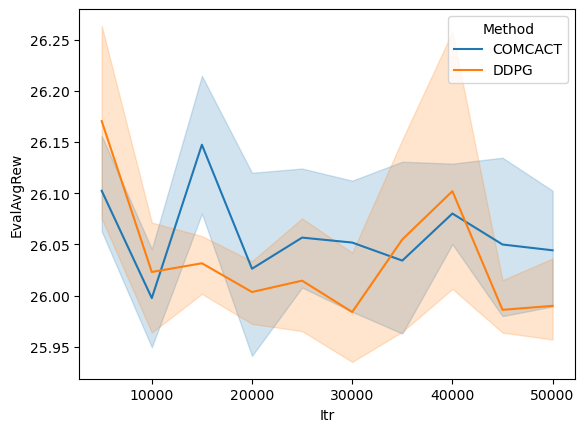

In [14]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [15]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,1831,67.023006,COMCACT,92.062286
100,1845,66.931022,COMCACT,90.669157
101,1859,67.193972,COMCACT,90.080834
102,1873,67.582859,COMCACT,89.840087
103,1889,77.513539,COMCACT,88.826911


In [16]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,1547,67.106012,DDPG,77.925784
100,1562,71.647634,DDPG,77.862680
101,1577,71.382935,DDPG,77.803504
102,1592,71.501004,DDPG,77.697593
103,1600,38.027469,DDPG,77.365571


In [17]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,1831,67.023006,COMCACT,92.062286
100,1845,66.931022,COMCACT,90.669157
101,1859,67.193972,COMCACT,90.080834
102,1873,67.582859,COMCACT,89.840087
103,1889,77.513539,COMCACT,88.826911


In [18]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
2779,49952,73.242973,DDPG,70.582681
2780,49967,73.469846,DDPG,70.589106
2781,49981,68.140586,DDPG,70.548345
2782,49996,73.497224,DDPG,70.704165
2783,50000,19.597790,DDPG,70.174999


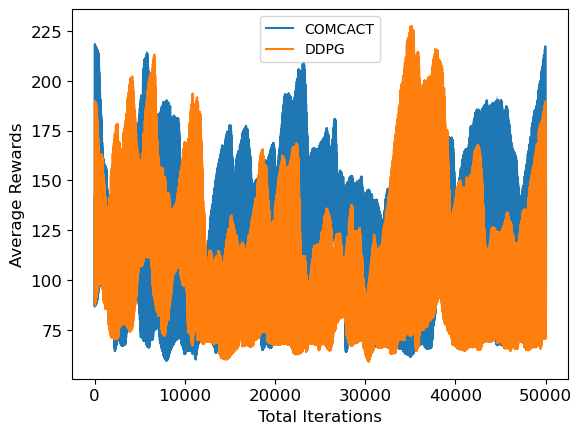

In [19]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')
plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_done_signal/"+img_prefix+"-DONE-TRAINING.png")

In [20]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,26.066892,COMCACT,26.081012
2,15000,26.052513,COMCACT,26.059703
3,20000,26.094485,COMCACT,26.073499
4,25000,26.012158,COMCACT,26.053322
5,30000,26.094692,COMCACT,26.053425


In [21]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,26.061054,DDPG,26.069018
2,15000,26.050116,DDPG,26.055585
3,20000,26.022684,DDPG,26.036400
4,25000,25.943360,DDPG,25.983022
5,30000,25.937633,DDPG,25.940496


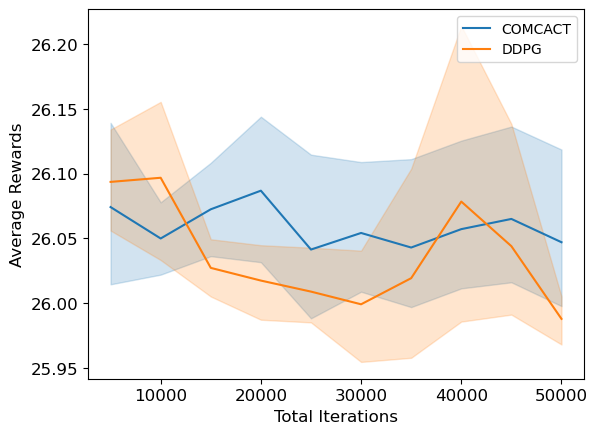

In [22]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')
plt.xlabel( xlabel = 'Total Iterations',fontsize=12) 
plt.ylabel(ylabel='Average Rewards',fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
fig.set_dpi(300)
plt.savefig("GRAPHICS/using_done_signal/"+img_prefix+"-DONE-EVALUATION.png")

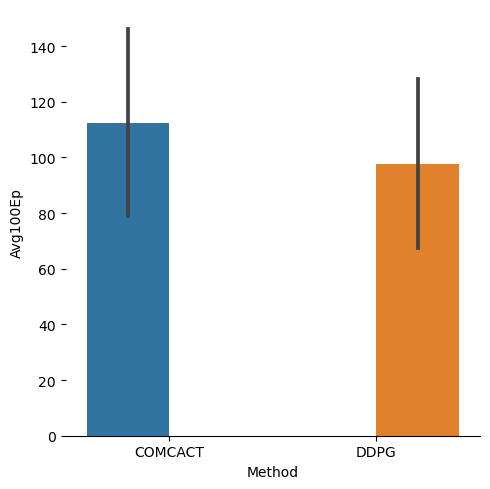

In [23]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

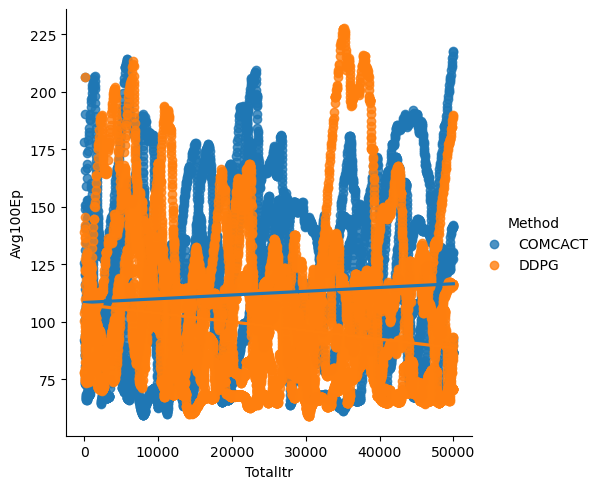

In [24]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)